## Tasksdescription:

- Create a new model with the formula 𝑤2 ⋅ 𝑡𝑢^2 + 𝑤1 ⋅ 𝑡𝑢 + 𝑏
- Adjust the training loop accordingly and perform the perform the training again
- Did the "loss" get bigger or smaller with the new model?
- Does the result look better or worse with the new model?
- Plot the progression of the loss over 5000 epochs of training with the new and old model in a graph.

## Implementation:

In [66]:
# import necessary packages
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [67]:
# import the data from the given file and store them under the variables t_u and t_c
values = np.loadtxt('vl5_data.csv')
t_u = torch.tensor(values[:,1])
t_c = torch.tensor(values[:,0])

In [ ]:

t_un = 0.1 * t_u
new_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True) # [w1, w2, b]
old_params = torch.tensor([1.0, 0.0], requires_grad=True) # [w, b]

In [68]:
def new_model(t_u, params):
    [w1, w2, b] = params
    t_p = w2 * pow(t_u, 2) + w1 * t_u + b
    return t_p

def old_model(t_u, params):
    [w, b] = params
    t_p = w*t_u + b
    return t_p

In [69]:
def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()


def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        if params.size(dim=0) == 3:
            train_t_p = new_model(train_t_u, params)
        else:
            train_t_p = old_model(train_t_u, params)
        train_loss = loss_fn(train_t_p, train_t_c)
        with torch.no_grad():
            if params.size(dim=0) == 3:
                val_t_p = new_model(val_t_u, params)
            else:
                val_t_p = old_model(val_t_u, params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False #Checks that our output requires_grad args are forced to False inside this block
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")

In [74]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
print(f'gesamtanzahl = {n_samples}, validierungsanzahl = {n_val}')

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices)
print(val_indices)

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

gesamtanzahl = 11, validierungsanzahl = 2
tensor([2, 6, 5, 0, 9, 7, 8, 4, 3])
tensor([10,  1])


In [ ]:
learning_rate = 1e-1
n_epochs = 5000

Epoch 1, Training loss 3.8866, Validation loss 2.7880
Epoch 2, Training loss 3.5214, Validation loss 5.6875
Epoch 3, Training loss 3.6759, Validation loss 8.0498
Epoch 500, Training loss 2.9413, Validation loss 3.8999
Epoch 1000, Training loss 2.9413, Validation loss 3.8999
Epoch 1500, Training loss 2.9413, Validation loss 3.8999
Epoch 2000, Training loss 2.9416, Validation loss 3.9744
Epoch 2500, Training loss 2.9413, Validation loss 3.8998
Epoch 3000, Training loss 2.9413, Validation loss 3.8999
Epoch 3500, Training loss 2.9413, Validation loss 3.8997
Epoch 4000, Training loss 2.9413, Validation loss 3.8983
Epoch 4500, Training loss 2.9413, Validation loss 3.8992
Epoch 5000, Training loss 2.9413, Validation loss 3.9000


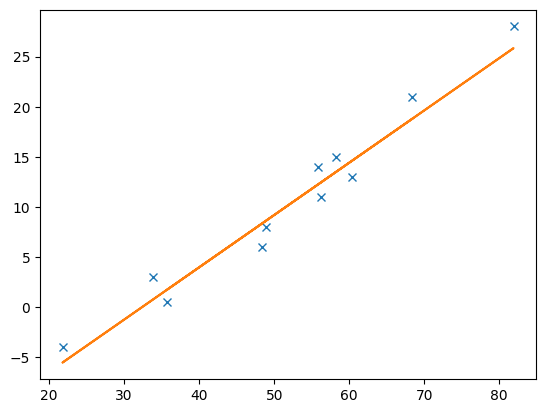

In [75]:
params = old_params
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(n_epochs, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
plt.plot(t_u, t_c, 'x')
t_p = old_model(t_un, params)
plt.plot(t_u, t_p.detach().numpy())

Epoch 1, Training loss 2.8414, Validation loss 4.2690
Epoch 2, Training loss 12.9238, Validation loss 44.6007
Epoch 3, Training loss 3.2811, Validation loss 14.7617
Epoch 500, Training loss 1.6880, Validation loss 6.1269
Epoch 1000, Training loss 1.6441, Validation loss 5.6347
Epoch 1500, Training loss 1.6439, Validation loss 5.6045
Epoch 2000, Training loss 1.6440, Validation loss 5.5423
Epoch 2500, Training loss 1.6439, Validation loss 5.6042
Epoch 3000, Training loss 1.6439, Validation loss 5.6019
Epoch 3500, Training loss 1.6566, Validation loss 6.2534
Epoch 4000, Training loss 1.6547, Validation loss 6.2035
Epoch 4500, Training loss 1.6439, Validation loss 5.6041
Epoch 5000, Training loss 1.8220, Validation loss 3.5072


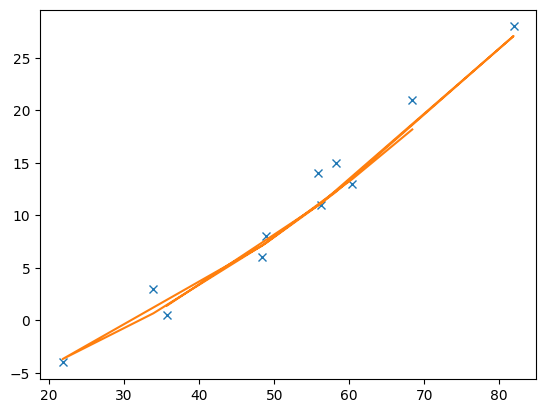

In [76]:
params = new_params
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(n_epochs, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)
plt.plot(t_u, t_c, 'x')
t_p = new_model(t_un, params)
plt.plot(t_u, t_p.detach().numpy())